##          Московский авиационный институт
###      (Национальный исследовательский университет)
####   Институт №8 «Информационные технологии и прикладная математика»
####        Кафедра вычислительной математики и программирования

  
 
 





            Лабораторная работа №  
            по курсу « ».
            
           

 
 
 







                                  Студент: Макаренкова В.М.
                                  Группа: 80-406Б
                                  Преподаватель: 


 

                        Москва, 2021

In [52]:
import numpy as np
import pandas as pd
import math as mh
import seaborn as sb

from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,10)
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

### I. Многослойная нейронная сеть для классификации точек в случае, когда классы не являются линейно разделимыми.

In [53]:
class Ellipse(object):
    def __init__(self, a, b, alpha = 0, x0 = 0, y0 = 0):
        self.a = a
        self.b = b
        self.alpha = alpha
        self.x0 = x0
        self.y0 = y0
        self.x, self.y = np.array([]), np.array([])
        self.dim = 0
        
    def f(self, t):
        x = self.a * np.cos(t)
        y = self.b * np.sin(t)
        return x * mh.cos(self.alpha) + y * mh.sin(self.alpha) - self.x0
    
    def g(self, t):
        x = self.a * np.cos(t)
        y = self.b * np.sin(t)
        return - x * mh.sin(self.alpha) + y * mh.cos(self.alpha) - self.y0

    def points_gen(self, start, stop, step):
        t = np.arange(start, stop, step)
        self.x = self.f(t)
        self.y = self.g(t)
        self.dim = np.size(t)

    def show(self, color='blue'):
        print('OK')
        
        
        plt.plot(self.x, self.y, color=color)
        plt.title('Эллипс')
        plt.ylabel('x')
        plt.xlabel('y')
        plt.grid()
        plt.show()

In [54]:
start = 0
step = 0.025
stop = 2 * mh.pi

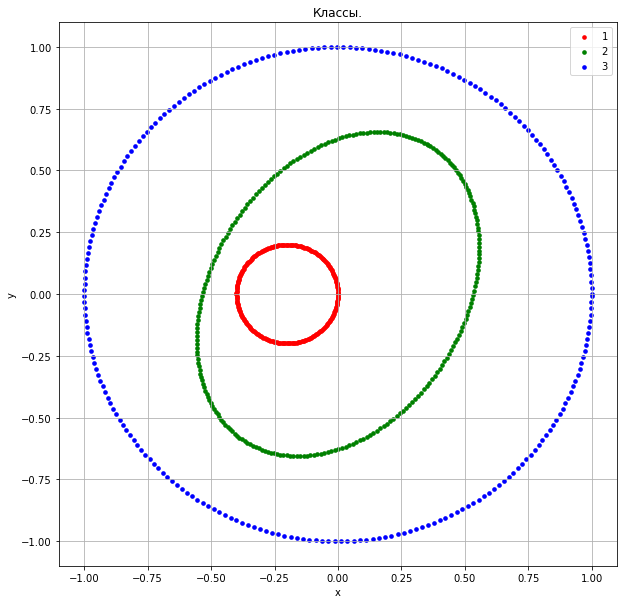

In [55]:
a, b, alpha, x0 = 0.2, 0.2, 0, 0.2
line1 = Ellipse(a, b, alpha,x0)
line1.points_gen(start, stop, step)

a, b, alpha, x0 = 0.7, 0.5, -mh.pi/ 3, 0
line2 = Ellipse(a, b, alpha)
line2.points_gen(start, stop, step)

a, b, = 1, 1
line3 = Ellipse(a, b)
line3.points_gen(start, stop, step)

plt.scatter(line1.x, line1.y, color='r', linewidth=2, s=7)
plt.scatter(line2.x, line2.y, color='g', linewidth=2, s=7)
plt.scatter(line3.x, line3.y, color='b', linewidth=2, s=7)

plt.title('Классы.')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(['1', '2', '3'], loc='upper right')
plt.grid()
plt.show()

In [56]:
r = np.array([[line1.x[i], line1.y[i]] for i in np.random.permutation(line1.dim)[:100]])
g = np.array([[line2.x[i], line2.y[i]] for i in np.random.permutation(line2.dim)[:100]])
b = np.array([[line3.x[i], line3.y[i]] for i in np.random.permutation(line3.dim)[:100]])

In [57]:
features = np.concatenate((r,g,b))
targets = np.concatenate((np.full(len(r), 0), np.full(len(g), 1), np.full(len(b), 2)))
train_X, test_X, train_Y, test_Y = train_test_split(features, targets, test_size=0.3, random_state=32)
val_X, test_X, val_Y, test_Y = train_test_split(test_X, test_Y, test_size=0.2, random_state=42)

In [60]:
model = keras.Sequential([
    keras.Input(shape=2),
    layers.Dense(25, activation = 'tanh'),
    layers.Dense(3, activation = 'tanh')
])
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=["accuracy"]
)

In [61]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta = 1e-4,
        patience = 500,
        )]
history = model.fit(train_X, train_Y,
                    batch_size = 1,
                    epochs = 300,
                    verbose = 2,
                    callbacks = callbacks,
                    validation_data=(val_X, val_Y))

Epoch 1/300
210/210 - 1s - loss: 1.1401 - accuracy: 0.3952 - val_loss: 1.0931 - val_accuracy: 0.4861 - 623ms/epoch - 3ms/step
Epoch 2/300
210/210 - 0s - loss: 1.1069 - accuracy: 0.4524 - val_loss: 1.0840 - val_accuracy: 0.4306 - 216ms/epoch - 1ms/step
Epoch 3/300
210/210 - 0s - loss: 1.0878 - accuracy: 0.4048 - val_loss: 1.0966 - val_accuracy: 0.4444 - 292ms/epoch - 1ms/step
Epoch 4/300
210/210 - 0s - loss: 1.0821 - accuracy: 0.5095 - val_loss: 1.0939 - val_accuracy: 0.4861 - 208ms/epoch - 989us/step
Epoch 5/300
210/210 - 0s - loss: 1.0759 - accuracy: 0.4762 - val_loss: 1.0981 - val_accuracy: 0.5000 - 228ms/epoch - 1ms/step
Epoch 6/300
210/210 - 0s - loss: 1.0735 - accuracy: 0.5429 - val_loss: 1.0989 - val_accuracy: 0.4722 - 213ms/epoch - 1ms/step
Epoch 7/300
210/210 - 0s - loss: 1.0671 - accuracy: 0.5381 - val_loss: 1.0972 - val_accuracy: 0.4028 - 285ms/epoch - 1ms/step
Epoch 8/300
210/210 - 0s - loss: 1.0669 - accuracy: 0.4571 - val_loss: 1.1072 - val_accuracy: 0.4722 - 282ms/epoch -

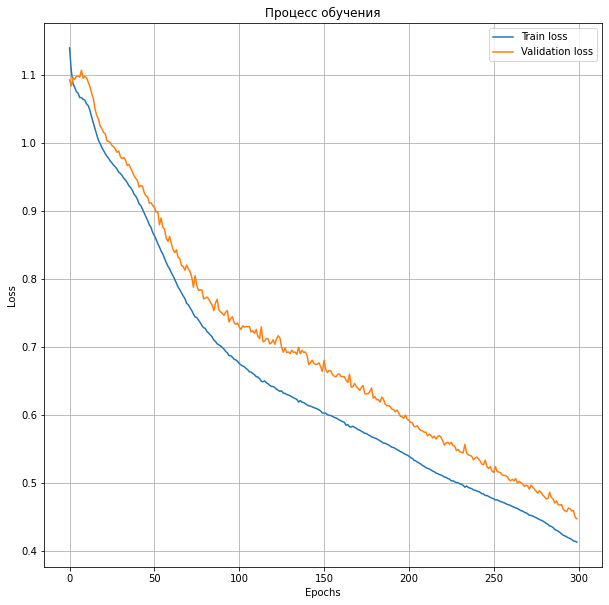

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Процесс обучения')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plt.grid()
plt.show()

In [63]:
model.evaluate(val_X, val_Y, verbose=2)
model.evaluate(test_X, test_Y, verbose=2)

3/3 - 0s - loss: 0.4473 - accuracy: 0.7778 - 110ms/epoch - 37ms/step
1/1 - 0s - loss: 0.5617 - accuracy: 0.5556 - 24ms/epoch - 24ms/step


[0.5617146492004395, 0.5555555820465088]

In [67]:
image = np.empty((0, 2))
n = np.arange(-1.1, 1.1, 0.025)
for i in n:
    for j in n:
        image = np.vstack((image, np.array([i, j])))

In [68]:
preds = model(image)
p = np.round(preds.numpy(), 1)

dimp = int(np.shape(p)[0] ** 0.5)
matrix = np.array( [ [ p[j * dimp + i] for i in range(dimp) ] for j in range(dimp) ])

KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7), constrained_layout=True)
p1 = axes[0].imshow(matrix, aspect='auto', origin="lower")

### II. Многослойная нейронная сеть для аппроксимации функции.

In [ ]:
def x(t):
    return np.sin(t**2 - 7 * t)

In [ ]:
a, b, h = 0, 5, 0.025
T = np.arange(a, b, h)
X = x(T)

In [ ]:
train_T, val_T =  np.array_split(T, [ int( 0.9 * np.shape(T)[0])])
train_X, val_X =  np.array_split(X, [ int( 0.9 * np.shape(X)[0])])

In [ ]:
plt.scatter(train_T, train_X, linewidth=2, s=7)
plt.scatter(val_T, val_X, linewidth=2, s=7)

plt.title('Аппроксимация функции')
plt.ylabel('x')
plt.xlabel('t')
plt.legend(['Обучающая выборка', 'Контрольная выборка'], loc='upper right')
plt.grid()
plt.show()